In [1]:
print("Hello")

Hello


# Ejercicio 1

In [2]:
# Cálculo de la semilla

padrones = [90638, 90638, 99714, 101939, 99689]
avg_padrones = sum(padrones) / len(padrones)
seed = int(avg_padrones)
seed

96523

In [85]:
# GCL 
# Genera números al azar entre 0 y 1 a partir de una semilla num.

modulo = 4294967296
multiplicador = 1013904223
incremento = 1664525

def next(num):
    return (multiplicador * num + incremento) % modulo

In [219]:
# Test

l=[]
num = next(seed)
for i in range(10000):
    l.append(num / modulo)
    num = next(num) 

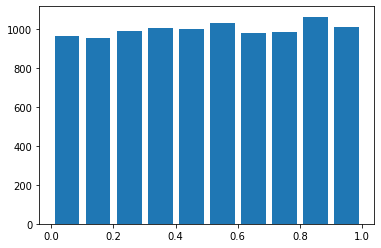

In [220]:
# Gráficos

import numpy as np 
import matplotlib.pyplot as plt

plt.hist(l, rwidth = 0.8) 
plt.show()

# Ejercicio 2a

In [193]:
values = [2,3,4,5,6]
p = [2730/10000,5200/10000,1370/10000,480/10000,220/10000]

# Se probó que con una distribución distinta sí se rechaza la hipótesis nula.
# p = [1000/10000,6570/10000,1370/10000,480/10000,220/10000]
p

[0.273, 0.52, 0.137, 0.048, 0.022]

In [194]:
proba_vector = [0, p[0], p[0] + p[1], p[0] + p[1] + p[2], p[0] + p[1] + p[2] + p[3], p[0] + p[1] + p[2] + p[3] + p[4]]
proba_vector

[0, 0.273, 0.793, 0.93, 0.9780000000000001, 1.0]

In [195]:
#      p2                       p3                          p4                 p5          p6
# 0 -------- 0.273 ----------------------- 0.793 ----------------------- 0.93 ----- 0.978 ---- 1

def find_label(x, proba_vec):
    label_idx = 0
    for idx in range(0, len(proba_vec)-1):
        if ((x >= proba_vec[idx]) and (x <= proba_vec[idx+1])):
            label_idx = idx
    return values[label_idx]

# Test
print(find_label(0.1, proba_vector)) # should be 2
print(find_label(0.2, proba_vector)) # should be 2
print(find_label(0.5, proba_vector)) # should be 3
print(find_label(0.8, proba_vector)) # should be 4
print(find_label(0.96, proba_vector)) # should be 5
print(find_label(0.99, proba_vector)) # should be 6
    

2
2
3
4
5
6


In [196]:
# Genero las simulaciones de valores.

variable_values=[]
num = next(seed)
for i in range(100000):
    variable_values.append(find_label(num / modulo, proba_vector))
    num = next(num) 


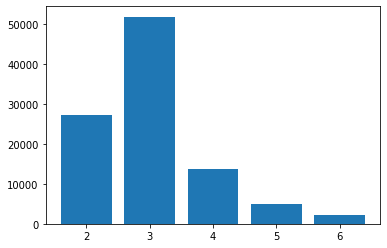

In [197]:
# Gráficos

import numpy as np 
import matplotlib.pyplot as plt

plt.bar(*np.unique(variable_values, return_counts=True))
plt.show()

# Ejercicio 2b

In [198]:
# Creo un dict, donde las keys son las etiquetas y los valores son las probabilidades de cada una.

proba_dict = dict(zip(values, p))

proba_dict

{2: 0.273, 3: 0.52, 4: 0.137, 5: 0.048, 6: 0.022}

## Test de chi2
Hipótesis nula: la distribución se corresponde con la propuesta por el enunciado.

In [201]:
# Estadístico del test: d^2 = sum i...k( (Ys - n * ps)^2 / (n * ps) )

from scipy.stats import chi2

d2 = 0
for i in range(2, 7):
    freq_observed = len([val for val in variable_values if val == i])
    freq_expected = proba_dict[i] * len(variable_values)
    partial_sum = (freq_observed - freq_expected)**2 / (freq_expected)
    d2 = d2 + partial_sum

# df son los grados de libertad de la chi, debería ser la cantidad de labels (K) menos 1 
sup_limit = chi2.ppf(0.95, df=4)
print("Límite superior: " + str(sup_limit))
print("D2: " + str(d2))

if d2 <= sup_limit:  
    print("El test no rechaza la hipotesis nula.") 
else:  
    print("El test rechaza la hipótesis nula") 

Límite superior: 9.487729036781154
D2: 5.177128632012732
El test no rechaza la hipotesis nula.


# Ejercicio 3

## Generar una distribución gaussiana
Se generara una distribución gaussiana a partir del método de aceptación y rechazo usando como base una exponencial generada con transformada inversa.

In [296]:
from matplotlib import pyplot as mp
import numpy as np

# Densidad de proba de una distribución gausiana
def gaussian(x, mu, sig):
    return np.exp(-np.power(-(x - mu), 2.) / (2 * np.power(sig, 2.))) / (np.sqrt(2*np.pi) * sig)

#f =e^(-(x - μ)^2/(2 σ^2))/(sqrt(2 π) σ)

# Densidad de proba de una distribución exponencial
def exponential(x, mu):
    return mu*np.exp(-mu*x)

# Inversa de la densidad de una VA exponencial
def inv_exponential(x, mu):
    return (- np.log(1-x) / mu)

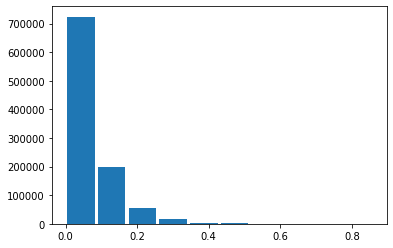

In [309]:
# Genero un vector de distribución exponencial a partir del generador

mu = 15
std_dev = 2

exp_distribution_vector = []
num = seed
for n in range(0, 100000):
    num = next(num) 
    exp_distribution_vector.append(inv_exponential(num / modulo, mu))

exp_distribution_vector
plt.hist(exp_distribution_vector, rwidth = 0.9) 
plt.show()

1.0762643959746617e-64


<ipython-input-311-5b9223049f6d>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return gaussian(value, mu, std_dev)/(c * exponential(value, mu))
<ipython-input-311-5b9223049f6d>:5: RuntimeWarning: invalid value encountered in double_scalars
  return gaussian(value, mu, std_dev)/(c * exponential(value, mu))


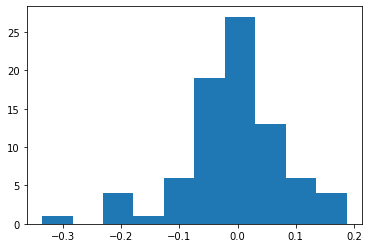

In [311]:
import random
# Genero una distribución normal a partir de la exponencial

def aceptation_proba(value, c):
    return gaussian(value, mu, std_dev)/(c * exponential(value, mu))

# Check
t = 10
c = gaussian(t, mu, std_dev) / exponential(t, mu)

print( exponential(t, mu))

normal_distribution_values = []

num1 = seed
num2 = random.uniform(0, 1)
for n in range(0, len(exp_distribution_vector)):
    num1 = next(num1)
    if num1 < aceptation_proba(n, c): # acepto exp_distribution_vector(n) con prob. aceptation_proba(n)
        num2 = random.uniform(0, 1)
        if num2 < 0.5:    # con prob 0.5 lo dejo positivo
            normal_distribution_values.append(exp_distribution_vector[n])
        else:           # con prob 0.5 lo hago negativo
            normal_distribution_values.append(-exp_distribution_vector[n])
        
normal_distribution_values 

plt.hist(normal_distribution_values) 
plt.show()
